<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [9]:
import pandas as pd
import seaborn as sns

Load the dataset into a dataframe.


In [66]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


/Users/georgeli/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ConvertedComp', ylabel='Density'>

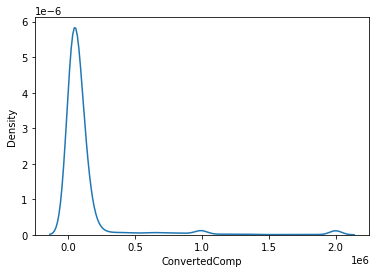

In [15]:
# your code goes here
# distribution curve for 'ConvertedComp'
sns.distplot(df['ConvertedComp'], 'ConvertedComp', hist=False, kde=True)

Plot the histogram for the column `ConvertedComp`.


array([[<AxesSubplot:title={'center':'ConvertedComp'}>]], dtype=object)

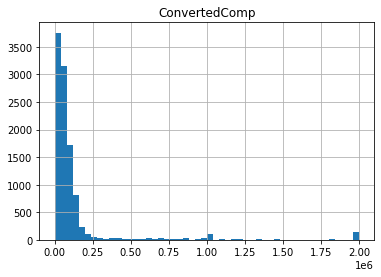

In [8]:
# your code goes here
df.hist(column='ConvertedComp', bins=50)

What is the median of the column `ConvertedComp`?


In [67]:
# your code goes here
ConvertedComp_median = df['ConvertedComp'].median()
print(ConvertedComp_median)


57745.0


How many responders identified themselves only as a **Man**?


In [17]:
# your code goes here
Man_count = df[df['Gender'] == 'Man']
print(Man_count.shape[0])

10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [22]:
# your code goes here
Women = df[df['Gender'] == 'Woman']
Women_comp = Women['ConvertedComp'].median()
print(Women_comp)


57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [62]:
# your code goes here
summary = df['Age']
print(df['Age'].median())
summary.describe()

29.0


count    9493.000000
mean       30.695860
std         7.346625
min        16.000000
25%        25.000000
50%        29.000000
75%        34.000000
max        99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<AxesSubplot:xlabel='Age', ylabel='Count'>

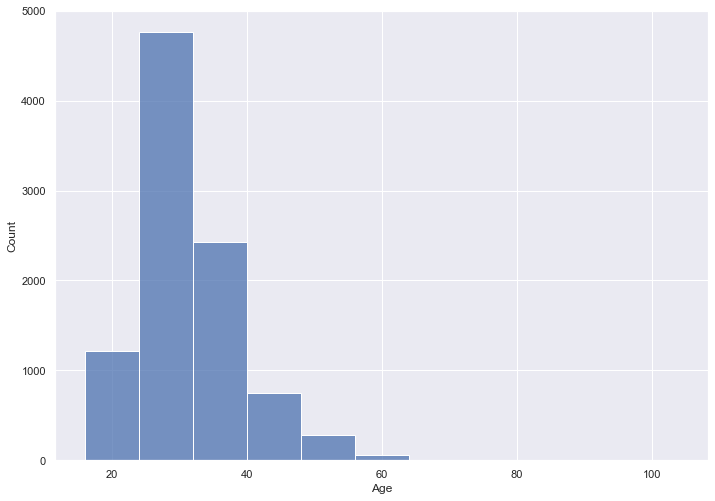

In [63]:
# your code goes here
sns.histplot(summary, binwidth=8)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

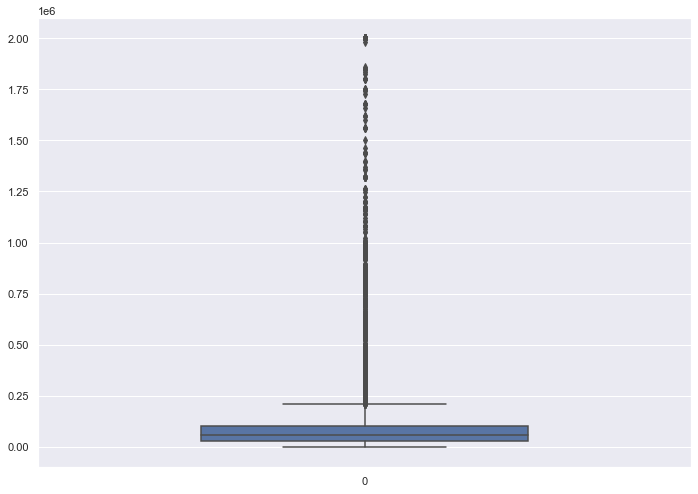

In [47]:
# your code goes here
sns.set(rc={'figure.figsize':(11.7,8.27)})
convertedcomp = df['ConvertedComp']
sns.boxplot(data=convertedcomp, width=0.5, )


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [54]:
# your code goes here
# Interquartile Range
iqr = convertedcomp.quantile(0.75) - convertedcomp.quantile(0.25)
print(iqr)

df['ConvertedComp'].describe()

Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print('The middle quartiles for ConvertedComp range from',Q1, 'to',Q3,'. The interquartile range is',IQR)


73132.0
The middle quartiles for ConvertedComp range from 26868.0 to 100000.0 . The interquartile range is 73132.0


Find out the upper and lower bounds.


In [55]:
# your code goes here
min_val = df['ConvertedComp'].min()
max_val = df['ConvertedComp'].max()
print('The min/max for ConvertedComp are',min_val, 'and', max_val)



The min/max for ConvertedComp are 0.0 and 2000000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [56]:
# your code goes here
print('Outliers below:',df['ConvertedComp'].lt(Q1 - 1.5*IQR).sum()) # Less then Q1 - 1.5*IQR
print('Outliers above:',df['ConvertedComp'].gt(Q3 + 1.5*IQR).sum()) # Greater then Q3 + 1.5*IQR
print('Median with outliers:',df['ConvertedComp'].median())
print('Median with outliers removed:',df[df['ConvertedComp'].le(Q3 + 1.5*IQR)]['ConvertedComp'].median())
print('Mean with outliers removed:',df[df['ConvertedComp'].le(Q3 + 1.5*IQR)]['ConvertedComp'].mean())


Outliers below: 0
Outliers above: 879
Median with outliers: 57745.0
Median with outliers removed: 52704.0
Mean with outliers removed: 59883.20838915799


<AxesSubplot:xlabel='Age'>

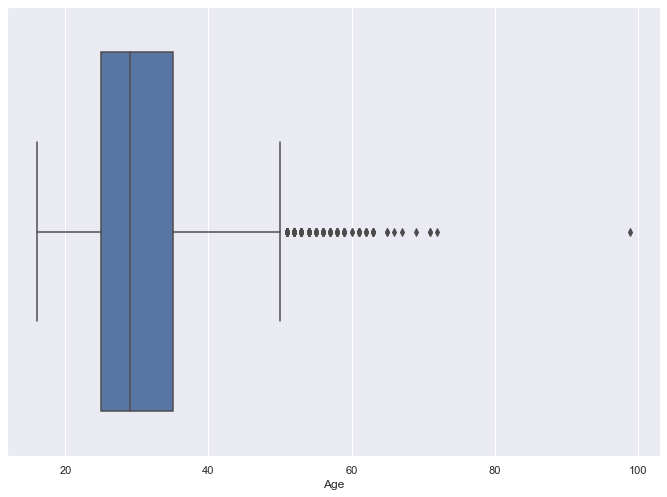

In [68]:
# Outliers for Age
sns.boxplot(x=df['Age'])

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [69]:
# your code goes here
print(df.shape)
print(df['ConvertedComp'].isnull().sum())
df = df[df['ConvertedComp'].le(Q3 + 1.5*IQR)]
print('Median after Remove Outliers', df['ConvertedComp'].median())
print('Mean after Remove Outliers', df['ConvertedComp'].mean())
print(df.shape)



(11398, 85)
816
Median after Remove Outliers 52704.0
Mean after Remove Outliers 59883.20838915799
(9703, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [59]:
# your code goes here
df.corr()['Age']

Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
